In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from pyearth import Earth
indeks = pd.read_csv('CSV87 dane.csv',sep=';', decimal=',',index_col='Data godzina')  ## tutaj przygotować dane wszystko do kupy jako jeden data frame kolumny pionowo##
indeks.head()

,RDN 1fix,CRO,Generacja wiatraków(PSE) w MWh,Krajowe Zapotrzebowanie na moc PSE,Generacja JWCD w MWh,Generacja nJWCD w MWh,Wymagana rezerwa mocy w MWh,Emisja CO2 EUR/Tona,Observation Poland National (C)
Data godzina,,,,,,,,,
01-01-17 1:00,107.52,72.2,2117.0,15750.0,7813.0,7937.0,1424.0,5.0,-1.75
01-01-17 2:00,104.40,72.2,2091.0,15000.0,7094.0,7906.0,1356.0,5.0,-1.75
01-01-17 3:00,83.66,72.2,2056.0,14250.0,6393.0,7857.0,1289.0,5.0,-1.75
01-01-17 4:00,75.15,72.2,2015.0,13725.0,5912.0,7813.0,1242.0,5.0,-1.85
01-01-17 5:00,74.99,72.1,1990.0,13425.0,5639.0,7786.0,1215.0,5.0,-1.95


In [2]:
feature_cols = ['Generacja wiatraków(PSE) w MWh','Krajowe Zapotrzebowanie na moc PSE','Generacja JWCD w MWh','Generacja nJWCD w MWh','Wymagana rezerwa mocy w MWh','Emisja CO2 EUR/Tona','Observation Poland National (C)']  ##Trzeba przygotować dane z nazwą kolumny ##
X = indeks[feature_cols]  ### wektor Xów zmiennych objasniających##
y = indeks['RDN 1fix']

In [3]:
X = X.fillna(method='ffill') ## uzupełnia brakujace dane o poprzedni okres##
y = y.fillna(method='ffill')

In [4]:
X_train, X_test = X[-11160:-288], X[-288:] ##Tutaj jakis inny split na ostatnich obserwacjach przed prognozą##
y_train, y_test = y[-11160:-288], y[-288:]

In [5]:
model = Earth()
model.fit(X_train,y_train)

C:\Users\Blizzardzik\Anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Blizzardzik\Anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [6]:
print(model.trace())
print(model.summary())

Forward Pass
---------------------------------------------------------------------
iter  parent  var  knot  mse          terms  gcv       rsq    grsq   
---------------------------------------------------------------------
0     -       -    -     3365.996654  1      3366.616  0.000  0.000  
1     0       2    6133  1680.714226  3      1682.571  0.501  0.500  
2     0       5    -1    1530.382227  4      1532.778  0.545  0.545  
3     0       0    8802  1521.062164  6      1524.847  0.548  0.547  
4     0       2    2973  1511.397801  8      1516.555  0.551  0.550  
5     0       2    7433  1499.523433  10     1506.027  0.555  0.553  
6     0       1    9762  1495.007493  12     1502.876  0.556  0.554  
7     0       4    9828  1487.510650  14     1496.720  0.558  0.555  
8     0       6    -1    1480.512176  15     1490.366  0.560  0.557  
9     0       3    4305  1476.654991  17     1487.856  0.561  0.558  
10    0       2    8193  1474.198279  19     1486.753  0.562  0.558  
-------

In [7]:
prediction=model.predict(X_test)

In [8]:
print(prediction[-24:])

[167.79755282 166.12892633 165.17741027 165.23357164 166.57412036
 167.45065639 185.70504776 210.39776997 221.06309475 222.91684621
 219.39711247 221.19327344 220.80227061 218.01441457 214.80796113
 213.37609545 210.17936687 209.58838263 212.02376784 220.6742921
 232.1807191  216.11508524 194.30480312 176.76871669]


In [9]:
pred=prediction[-24:] ## tutaj ostatnie 24 obserwacje prognozowane#

In [10]:
base=pred.mean()
pred.mean()

200.744635739644

In [11]:
wyniki = pd.DataFrame()
wyniki['Actual']= y_test[:264]
wyniki['predicted']= prediction[:264]
wyniki.columns=['Actual','predicted']
#wyniki=wyniki.sort_values(by=['Actual'])#
wyniki['index']=range(len(wyniki))

<IPython.core.display.Javascript object>


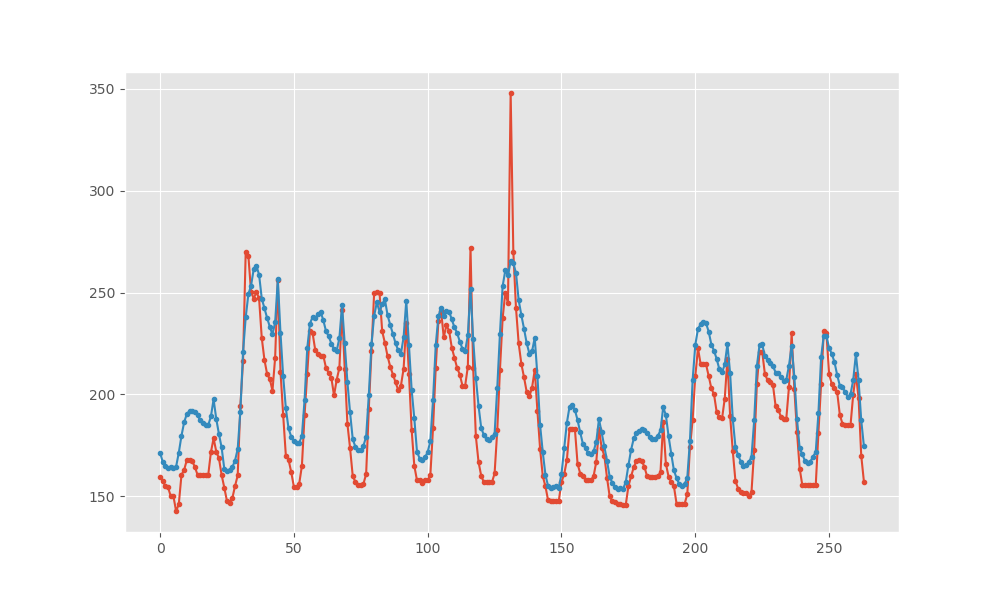

In [12]:
%matplotlib notebook
plt.style.use('ggplot')
plt.figure()
plt.plot(wyniki['index'],wyniki['Actual'],marker='.')## Czerwone kropki to obserwacje za ostatnie 11 dni, niebieskie to prognoza
plt.plot(wyniki['index'],wyniki['predicted'],marker='.',) 

In [31]:
from sklearn.metrics import r2_score   #tutaj błędy modelu na zbiorze testowym  tego 99%##
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
r=r2_score(wyniki['Actual'],wyniki['predicted'])
msle=mean_squared_log_error(wyniki['Actual'],wyniki['predicted'])
mse=mean_squared_error(wyniki['Actual'],wyniki['predicted'])
mae=mean_absolute_error(wyniki['Actual'],wyniki['predicted'])
evs=explained_variance_score(wyniki['Actual'],wyniki['predicted'])
medianae=median_absolute_error(wyniki['Actual'],wyniki['predicted'])
bledy1= np.array([['r2_score','mean squared log error','mean squared error','mean absolute error','explained variance score','median absolute error'],[r,msle,mse,mae,evs,medianae]],dtype='U25')
df = pd.DataFrame(data=bledy1,columns=bledy1[0])
Bledy2=df.drop(0)
Bledy2.head()

,r2_score,mean squared log error,mean squared error,mean absolute error,explained variance score,median absolute error
1,0.734919486027,0.00753238718695,285.062798752,15.1390005472,0.90788601668,15.1449883826


In [13]:
dates2 = pd.date_range(start='2018-04-26 01:00',end='2018-04-27 00:00',freq='1h') 
for i in range(0,24):
    dates2[i]

In [14]:
prognoza24h=pd.DataFrame(data=pred,
                      index=dates2,
                      columns=['prognoza rdn'])

In [15]:
prognoza24h

,prognoza rdn
2018-04-26 01:00:00,167.797553
2018-04-26 02:00:00,166.128926
2018-04-26 03:00:00,165.177410
2018-04-26 04:00:00,165.233572
2018-04-26 05:00:00,166.574120
2018-04-26 06:00:00,167.450656
2018-04-26 07:00:00,185.705048
2018-04-26 08:00:00,210.397770
2018-04-26 09:00:00,221.063095
2018-04-26 10:00:00,222.916846


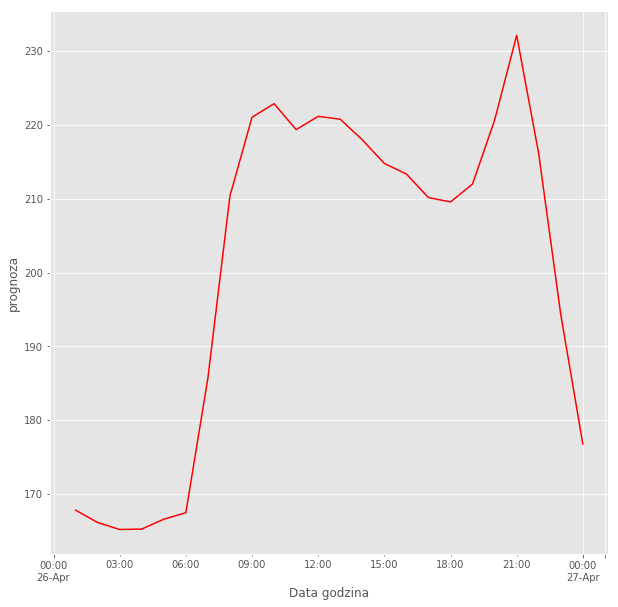

In [16]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

prognoza24h['prognoza rdn'].plot(figsize=(10,10),color='red')

plt.xlabel('Data godzina')
plt.ylabel('prognoza')
plt.show()

In [17]:
peak1=prognoza24h.sort_index().loc[prognoza24h.index[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]]  ## tutaj peak ##
peak1.mean()
print(peak1)
print(peak1.mean())##PEAK pod szeregiem##
peak=peak1.mean()
base=prognoza24h.mean()

                     prognoza rdn
2018-04-26 08:00:00    210.397770
2018-04-26 09:00:00    221.063095
2018-04-26 10:00:00    222.916846
2018-04-26 11:00:00    219.397112
2018-04-26 12:00:00    221.193273
2018-04-26 13:00:00    220.802271
2018-04-26 14:00:00    218.014415
2018-04-26 15:00:00    214.807961
2018-04-26 16:00:00    213.376095
2018-04-26 17:00:00    210.179367
2018-04-26 18:00:00    209.588383
2018-04-26 19:00:00    212.023768
2018-04-26 20:00:00    220.674292
2018-04-26 21:00:00    232.180719
2018-04-26 22:00:00    216.115085
prognoza rdn    217.515363
dtype: float64


In [18]:
basepeak2=pd.DataFrame(data=peak,
                      index=None,
                      columns=['peak'])
basepeak1=pd.DataFrame(data=base,
                index=None,
                      columns=['base'])
tabelka1= basepeak1.combine_first(basepeak2)
tabelka1

,base,peak
prognoza rdn,200.744636,217.515363
